In [10]:
from sympy import init_printing; init_printing();
from sympy import symbols, sin, cos, tan, acos, sqrt, Eq, Function, Array
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

## Spherical Coordinates

Transform Relation from $(r, \theta, \phi)$ to $(x, y, z)$:

\begin{equation}
\left\{\begin{matrix}
x =& r \sin\theta & \cos\phi \\ 
y =& r \sin\theta & \sin\phi \\ 
z =& r \cos\theta &
\end{matrix}\right.
\end{equation}

Transform Relation from $(x, y, z)$ to $(r, \theta, \phi)$:
\begin{equation}
\left\{\begin{matrix}
 & r^2 =& x^2+y^2+z^2 & \\ 
\tan & \phi  =& y/x & \\ 
& \theta =& \arccos (z/r) & = \arccos (\frac{z}{\sqrt{x^2+y^2+z^2}}) 
\end{matrix}\right.
\end{equation}

In [38]:
r, theta, phi = symbols('r theta phi', real=True)
x, y, z = [f(r,theta,phi) for f in symbols('x, y, z', real=True, cls=Function)]

In [41]:

eq_list = [
    Eq(x, r * sin(theta) * cos(phi)),
    Eq(y, r * sin(theta) * sin(phi)),
    Eq(z, r * cos(theta))]
for eq in eq_list: eq
diffed_eq_list = []
for eq in eq_list:
    for var in [r, theta, phi]:
        diffed_eq_list.append(
            Eq(eq.lhs.diff(var),
               eq.rhs.diff(var)))# .subs(x**2+y**2+z**2, r**2).simplify() )

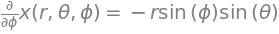

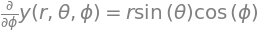

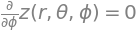

In [42]:
for diffed_eq in diffed_eq_list: diffed_eq

\begin{equation}
\vec{e}_{1} = \frac{\partial \vec{r}}{\partial r} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial r},\quad
\vec{e}_{2} = \frac{\partial \vec{r}}{\partial \theta} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial \theta},\quad
\vec{e}_{3} = \frac{\partial \vec{r}}{\partial \phi} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial \phi}
\end{equation}

In [50]:
from einsteinpy.symbolic.vector import GenericVector

e_i = [None, None, None] # The three components would be 
for i, var in enumerate([r, theta, phi]):
    e_i_temp = Array([x.diff(var), y.diff(var), z.diff(var)])
    for eq in diffed_eq_list:
        e_i_temp = e_i_temp.subs(eq.lhs, eq.rhs)
    e_i[i] = e_i_temp

In [54]:
from sympy import trigsimp
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
for i in range(3):
    for j in range(3):
        metric[i][j] = (lambda vec1, vec2: 
                        vec1[0]*vec2[0] + vec1[1]*vec2[1] + vec1[2]*vec2[2])(e_i[i], e_i[j])
        metric[i][j] = trigsimp(metric[i][j])
        # metric[i][j]
metric

In [55]:
# define the metric for 3d spherical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
metric[0][0] = 1
metric[1][1] = r**2
metric[2][2] = (r**2)*(sin(theta)**2)
# creating metric object
m_obj = MetricTensor(metric, (r, theta, phi), config='ll')
m_obj.tensor()

⎡1  0       0     ⎤
⎢                 ⎥
⎢    2            ⎥
⎢0  r       0     ⎥
⎢                 ⎥
⎢        2    2   ⎥
⎣0  0   r ⋅sin (θ)⎦

In [33]:
ch = ChristoffelSymbols.from_metric(m_obj)
ch.config

'ull'

In [34]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

In [35]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
rm2.tensor()

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦